## Imports

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Plots

In [33]:
def create_plot(path, bertopic):

    df_metrics = pd.read_csv(path)
    
    if bertopic == True:
        names = ['num_topics','coherence','topic_diversity']  
    else:
        names = ['Topics','Coherence','Topic Diversity']
        df_metrics = df_metrics.drop(df_metrics.columns[0],axis = 1)
        
    
    # Create a new column `Quality` by multiplying `Coherence` and `Topic Diversity`
    df_metrics['Quality'] = df_metrics[names[1]] * df_metrics[names[2]]

    # Group by number of topics and pick the row with the maximum `quality`
    df_grouped = df_metrics.loc[df_metrics.groupby(names[0])['Quality'].idxmax()].copy()

    # Sort the dataframe on number of topics in ascending order
    df_grouped= df_grouped.sort_values(names[0])
    
    # Filter the dataframe `df_grouped` to get the row where the `Quality` is maximum and the number of topics is greater than 5
    df_max_quality = df_grouped[(df_grouped['Quality'] == df_grouped[df_grouped[names[0]] > 5]['Quality'].max())]

    # Get the number of topics corresponding to the maximum `Quality` from `df_max_quality`
    max_quality_num_topics = df_max_quality[names[0]].values[0]

    max_quality_value = df_max_quality['Quality'].values[0]

    plt.figure(figsize=(10, 6))

    for metric in [names[1], names[2], 'Quality']:
        plt.plot(df_grouped[names[0]], df_grouped[metric], label=metric, marker='o')

    plt.xlabel('Number of Topics')
    plt.ylabel('Score')
    plt.title('Evaluation Metrics vs Number of Topics')

    plt.legend(loc='upper right')

    # Highlight the area of maximum quality (num_topics > 5)
    plt.axvspan(max_quality_num_topics - 1, max_quality_num_topics + 1, facecolor='lightgray', alpha=0.3)

    plt.grid(True)
    plt.show()
    
    return df_grouped
    


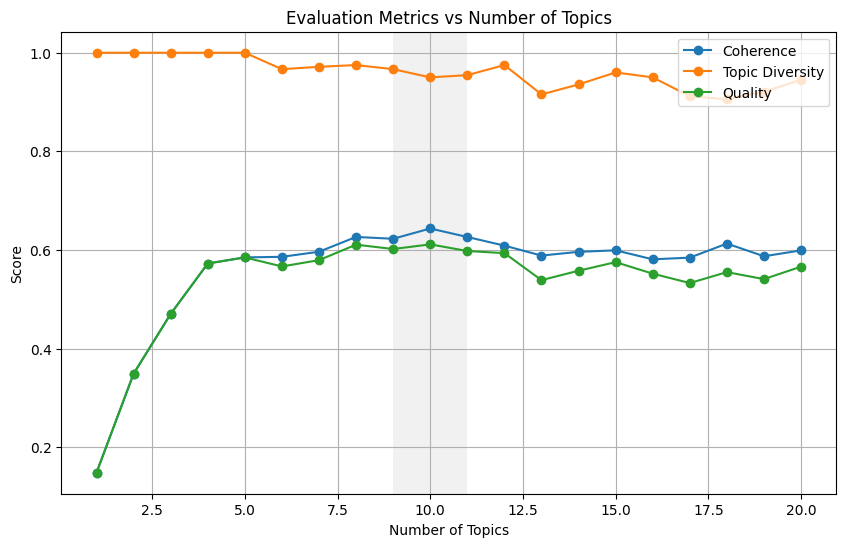

,Topics,Alpha,Beta,Coherence,Topic Diversity,Quality
0,1,0.01,0.01,0.148243,1.000000,0.148243
147,2,symmetric,0.31,0.348939,1.000000,0.348939
21,3,0.9099999999999999,0.9099999999999999,0.470261,1.000000,0.470261
4,4,0.31,symmetric,0.572514,1.000000,0.572514
43,5,0.9099999999999999,0.9099999999999999,0.584914,1.000000,0.584914
235,6,asymmetric,0.61,0.586092,0.966667,0.566556
190,7,0.61,0.01,0.596390,0.971429,0.579350
178,8,0.61,0.9099999999999999,0.626399,0.975000,0.610739
204,9,0.9099999999999999,0.61,0.622657,0.966667,0.601902
298,10,0.61,0.9099999999999999,0.643539,0.950000,0.611362


In [34]:
create_plot('df_0_3_sorted_by_diversity_lda_all.csv', False)

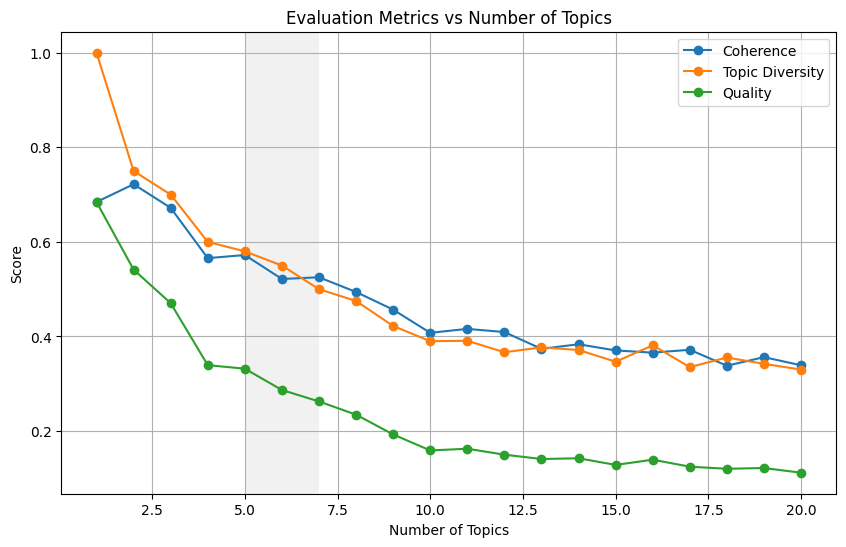

,Topics,One Pass,Power Iterations,Extra Samples,Coherence,Topic Diversity,Quality
20,1,False,1,250,0.684392,1.000000,0.684392
68,2,True,2,50,0.721927,0.750000,0.541445
88,3,False,2,250,0.672015,0.700000,0.470410
151,4,True,1,250,0.565642,0.600000,0.339385
196,5,True,2,250,0.572241,0.580000,0.331900
232,6,True,1,150,0.521558,0.550000,0.286857
272,7,False,1,150,0.525192,0.500000,0.262596
318,8,True,1,250,0.494042,0.475000,0.234670
362,9,True,1,250,0.456694,0.422222,0.192826
398,10,True,1,50,0.407734,0.390000,0.159016


In [35]:
create_plot('df_0_3_sorted_by_diversity_lsi_all.csv', False)

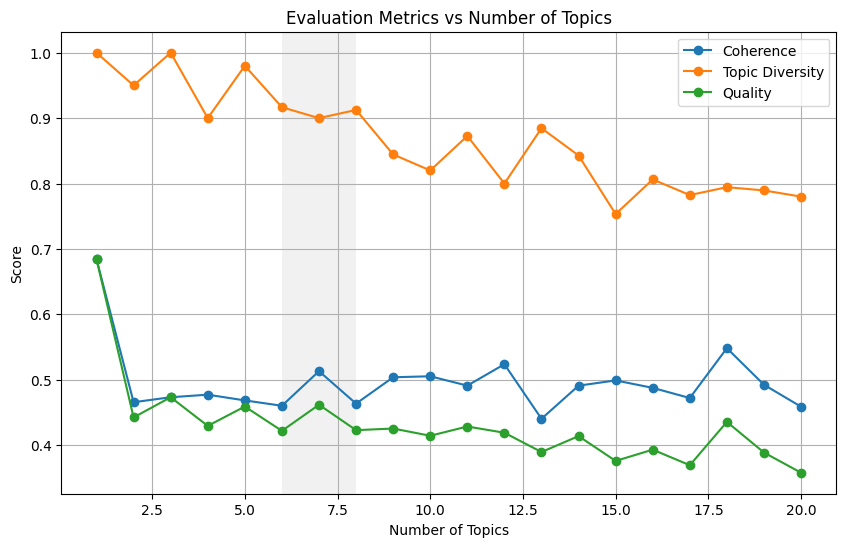

,Topics,Passes,Kappa,W Max Iterations,H Max Iterations,Coherence,Topic Diversity,Quality
18,1,5,0.3,50,50,0.684392,1.000000,0.684392
207,2,10,1.0,50,50,0.465668,0.950000,0.442385
315,3,10,1.0,50,50,0.473261,1.000000,0.473261
423,4,10,1.0,50,50,0.477170,0.900000,0.429453
531,5,10,1.0,50,50,0.468417,0.980000,0.459049
639,6,10,1.0,50,50,0.460206,0.916667,0.421855
747,7,10,1.0,50,50,0.513116,0.900000,0.461804
855,8,10,1.0,50,50,0.463489,0.912500,0.422933
963,9,10,1.0,50,50,0.503790,0.844444,0.425422
1071,10,10,1.0,50,50,0.505324,0.820000,0.414366


In [36]:
create_plot('df_0_3_sorted_by_diversity_nmf_all.csv', False)

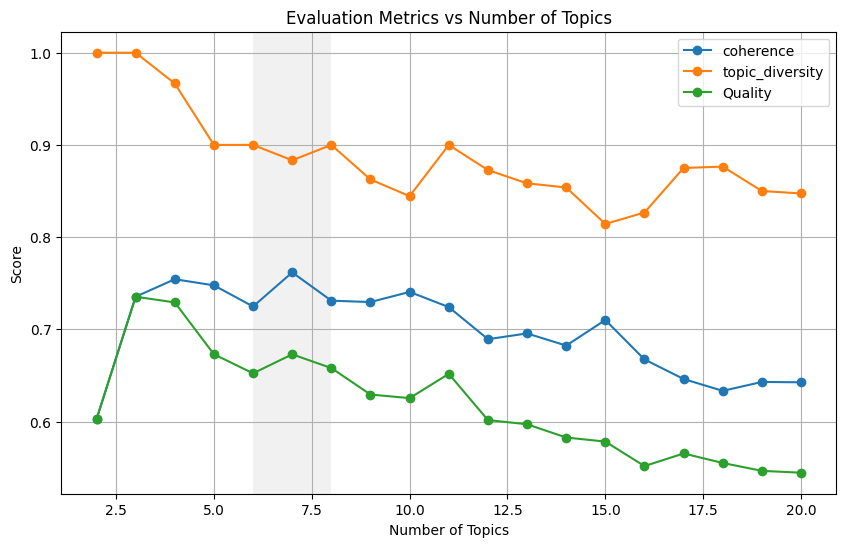

,model_name,num_topics,mmr_diversity,coherence,topic_diversity,Quality
0,bertopic_n_clusters_2_diversity_mmr_0.2.bertopic,2,0.2,0.602474,1.000000,0.602474
5,bertopic_n_clusters_3_diversity_mmr_0.2.bertopic,3,0.2,0.735350,1.000000,0.735350
10,bertopic_n_clusters_4_diversity_mmr_0.2.bertopic,4,0.2,0.754321,0.966667,0.729177
15,bertopic_n_clusters_5_diversity_mmr_0.2.bertopic,5,0.2,0.747681,0.900000,0.672913
23,bertopic_n_clusters_6_diversity_mmr_0.8.bertopic,6,0.8,0.724742,0.900000,0.652267
26,bertopic_n_clusters_7_diversity_mmr_0.4.bertopic,7,0.4,0.761721,0.883333,0.672854
33,bertopic_n_clusters_8_diversity_mmr_0.8.bertopic,8,0.8,0.731053,0.900000,0.657948
36,bertopic_n_clusters_9_diversity_mmr_0.4.bertopic,9,0.4,0.729571,0.862500,0.629255
40,bertopic_n_clusters_10_diversity_mmr_0.2.bertopic,10,0.2,0.740559,0.844444,0.625361
47,bertopic_n_clusters_11_diversity_mmr_0.6.bertopic,11,0.6,0.724111,0.900000,0.651700


In [37]:
create_plot('bertopic_grid_search_results_final.csv', True)